# Natural Language Processing


## Word to Matrix / Vectors

Documents have different length, and consist of sequences of words. How do we create features X to characterize a document?


### Bag-of-Words

- From a dictionary, identify the 10K most frequently occurring words.
- Create a binary vector of length $p=10K$ for each document, and score a 1 in every position that the corresponding word occurred.
  - With $n$ documents, we now have a $n*p$ **sparse** feature matrix X.

#### Drawbacks

- `Bag-of-Words (BoW)` **does not consider the sequence of words** in the text. It consider words independently, we call it `unigrams`. We can instead use `bigrams` (occurrences of adjacent word pairs), and in general `n-grams`.

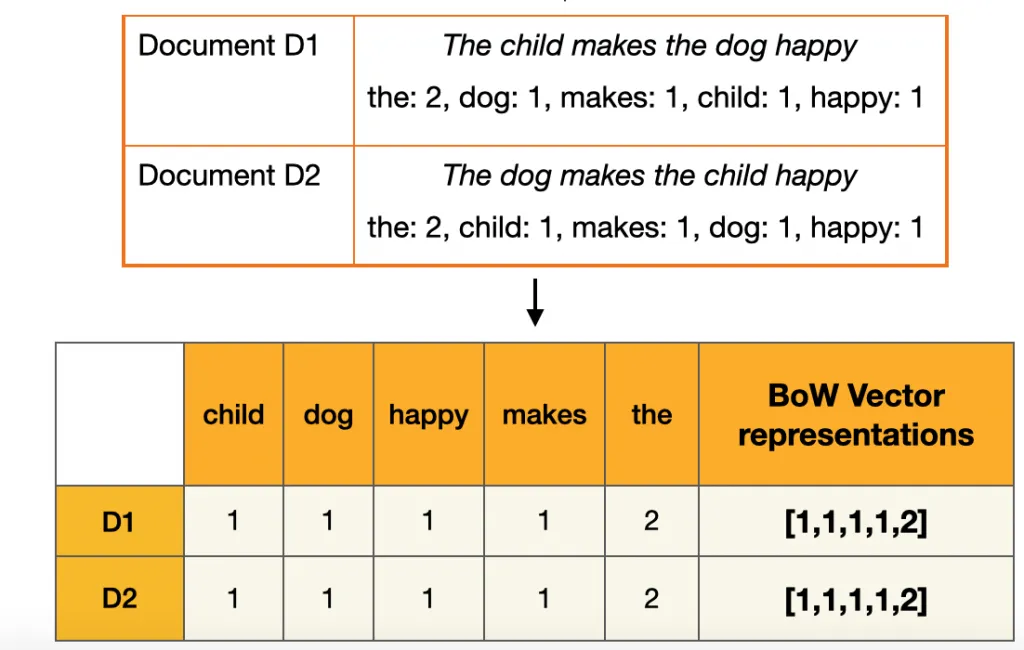


### N-grams

N-grams are contiguous sequences of n items (words, characters, or tokens) extracted from a text corpus. In the context of natural language processing (NLP), N-grams are commonly used to capture patterns and dependencies between words in a sequence of text.

#### Advantages

- **Capturing Context**: N-grams preserve some level of word order and context, allowing models to capture dependencies between adjacent words.
- **Flexibility**: N-grams can be adjusted to different granularities (`unigrams`, `bigrams`, `trigrams`, etc.), providing flexibility in capturing different levels of context.

#### Drawbacks

- **Data Sparsity:** As the length of the n-grams increases, the number of unique combinations grows exponentially, leading to sparsity issues, especially with smaller datasets.
- **Lack of Generalization**: N-grams may **overfit** to specific patterns present in the training data, making them less generalizable to unseen data.

#### Mitigation Strategies

- **Pruning**: Limit the vocabulary size or discard low-frequency n-grams to reduce computational complexity.
- **Smoothing**: Address data sparsity issues by smoothing probabilities of unseen n-grams.

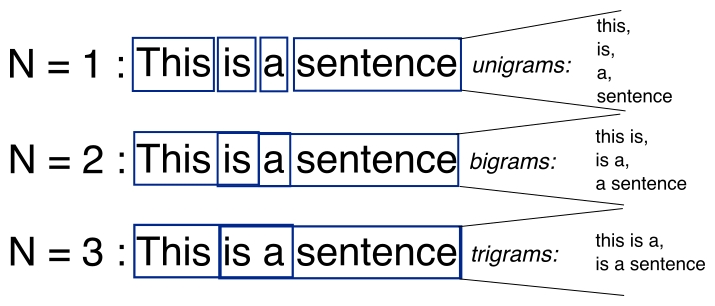


## TF-IDF

- [Reference](https://www.kdnuggets.com/2022/09/convert-text-documents-tfidf-matrix-tfidfvectorizer.html)
  $$
  TF-IDF(t,d,D) = TF(t,d) * IDF(t,D)
  $$

### Term Frequency (TF)

Measures how frequently a term (word) occurs in a document.

- It is calculated as the ratio of the number of times a term appears in a document to the total number of terms in the document.
  $$
  TF(t,d) = \frac{Number\: of\: occurrences\: of\: term\: t\: in\: document\: d}{Total\: number\: of\: terms\: in\: document\: d}
  $$

### Inverse Document Frequency (IDF)

Measures **how important a term is** across the entire collection of documents.

- It is calculated as the logarithm of the ratio of the total number of documents to the number of documents containing the term, with a smoothing term to avoid division by zero.

  $$
  IDF(t,D) = log(\frac{Number\: of \: documents}{Number\: of\: documents\: containing\: term\: t})
  $$

- **Text A**: Jupiter is the largest planet
- **Text B**: Mars is the fourth planet from the sun

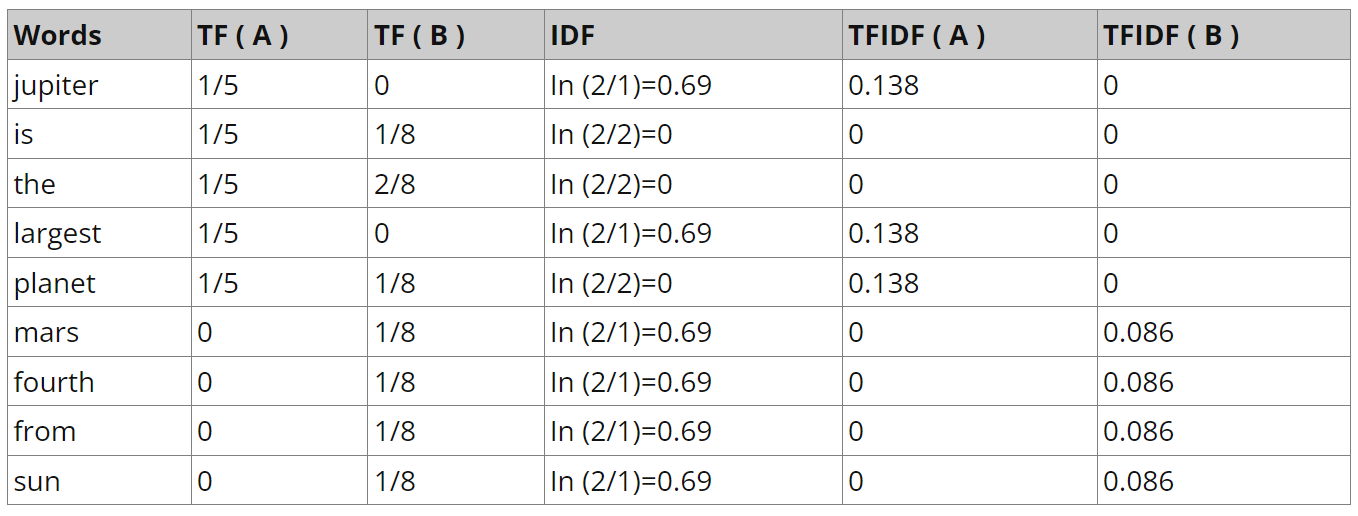


### Drawbacks

- `BoW` and `TF-IDF` represent words as sparse vectors of counts or weighted frequencies, respectively, without **capturing semantic relationships between words**.
- They may **struggle to handle out-of-vocabulary words** and fail to capture subtle semantic similarities between words.

### Example

- In this tutorial, we are going to use `TfidfVectorizer` from `scikit-learn` to convert the text and view the `TF-IDF` matrix.
- In the code below, we have a small corpus of 4 documents.
  - First, we will create a vectorizer object using `TfidfVectorizer()` and fit and transform the text data into vectors.
  - After that, we will use vectorizers to extract the names of the words.


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [2]:
corpus = [
          'KDnuggets Collection of data science Projects',
          '3 Free Statistics Courses for data science',
          'Parallel Processing Large File in Python',
          '15 Python Coding Interview Questions You Must Know For data science',
 ]

vectorizer = TfidfVectorizer()

# TD-IDF Matrix
X = vectorizer.fit_transform(corpus)

# extracting feature names
tfidf_tokens = vectorizer.get_feature_names_out()

We will now use TF-IDF tokens and vectors to create a pandas dataframe.

1. Convert the vectors to arrays and add it to the data argument.
2. Four indexes are created manually.
3. `tfidf_tokens` names are added to columns


In [4]:
result = pd.DataFrame(
    data=X.toarray(), 
    index=["Doc1", "Doc2", "Doc3", "Doc4"], 
    columns=tfidf_tokens
)

result

,15,coding,collection,courses,data,file,for,free,in,interview,...,must,of,parallel,processing,projects,python,questions,science,statistics,you
Doc1,0.000000,0.000000,0.455732,0.000000,0.290888,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.455732,0.000000,0.000000,0.455732,0.000000,0.000000,0.290888,0.000000,0.000000
Doc2,0.000000,0.000000,0.000000,0.474771,0.303040,0.000000,0.374315,0.474771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.303040,0.474771,0.000000
Doc3,0.000000,0.000000,0.000000,0.000000,0.000000,0.421765,0.000000,0.000000,0.421765,0.000000,...,0.000000,0.000000,0.421765,0.421765,0.000000,0.332524,0.000000,0.000000,0.000000,0.000000
Doc4,0.332264,0.332264,0.000000,0.000000,0.212080,0.000000,0.261961,0.000000,0.000000,0.332264,...,0.332264,0.000000,0.000000,0.000000,0.000000,0.261961,0.332264,0.212080,0.000000,0.332264


## Word Embeddings (Word2Vec, FastText)

- [Reference](https://kavita-ganesan.com/fasttext-vs-word2vec/)  
  Word Embeddings are dense vector representations of words in a continuous vector space, where **words with similar meanings are represented by vectors that are close together**.

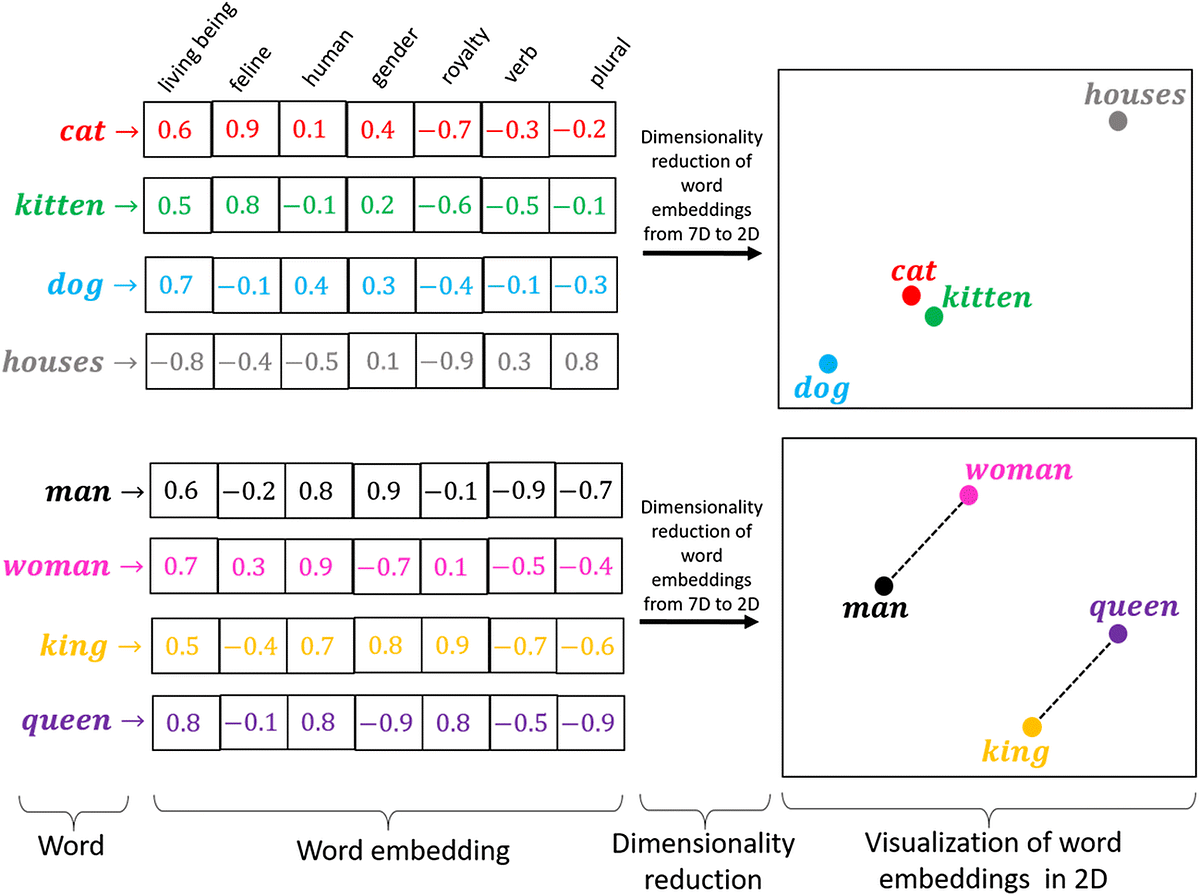

### Word2Vec

- `Word2Vec`, introduced by Mikolov et al. in 2013, aims to learn word embeddings by predicting the context of words in a large corpus. It uses shallow neural networks to learn distributed representations of words based on their co-occurrence patterns.
- `Word2Vec` uses a `softmax` function and `negative sampling` or `hierarchical softmax` to train the neural network efficiently.
- `Word2Vec` consists of two primary architectures: `Continuous Bag of Words (CBOW)` and `Skip-gram`.
  - In `CBOW`, the model predicts the target word based on its context words
  - In `Skip-gram`, the model predicts context words given the target word.

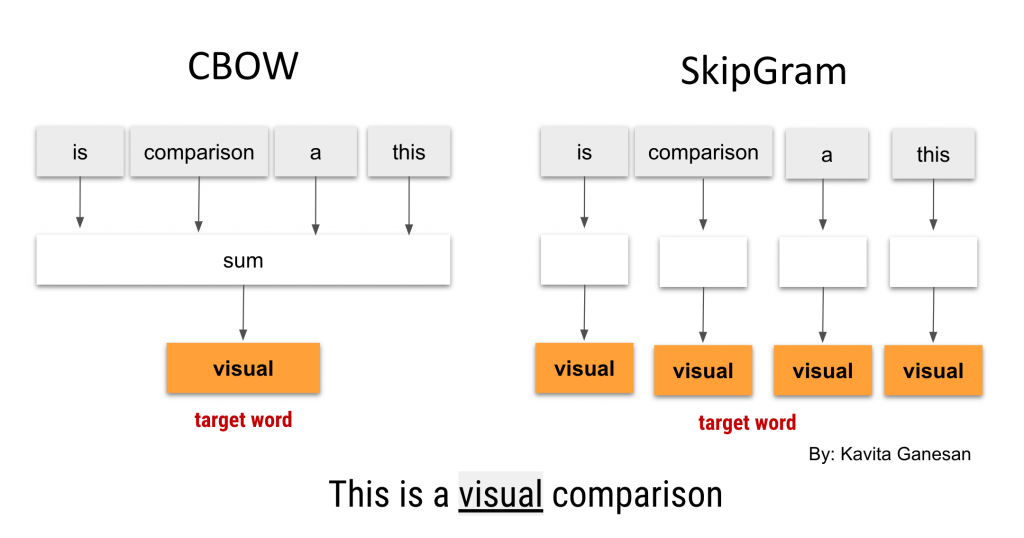

### FastText

- `FastText`, also developed by Mikolov et al., extends `Word2Vec` by **considering subword information**. It learns embeddings **not only for complete words but also for character n-grams**, allowing it to capture morphological information and handle out-of-vocabulary words better.
- `FastText` extends `Word2Vec` by representing words as the sum of the embeddings of their `character n-grams`.
  - A `character n-gram` is a set of co-occurring characters within a given window. It’s very similar to `word n-grams`, only that the window size is at the character level.
  - It learns embeddings for **both words and character n-grams separately and combines them to generate the final word embeddings**.

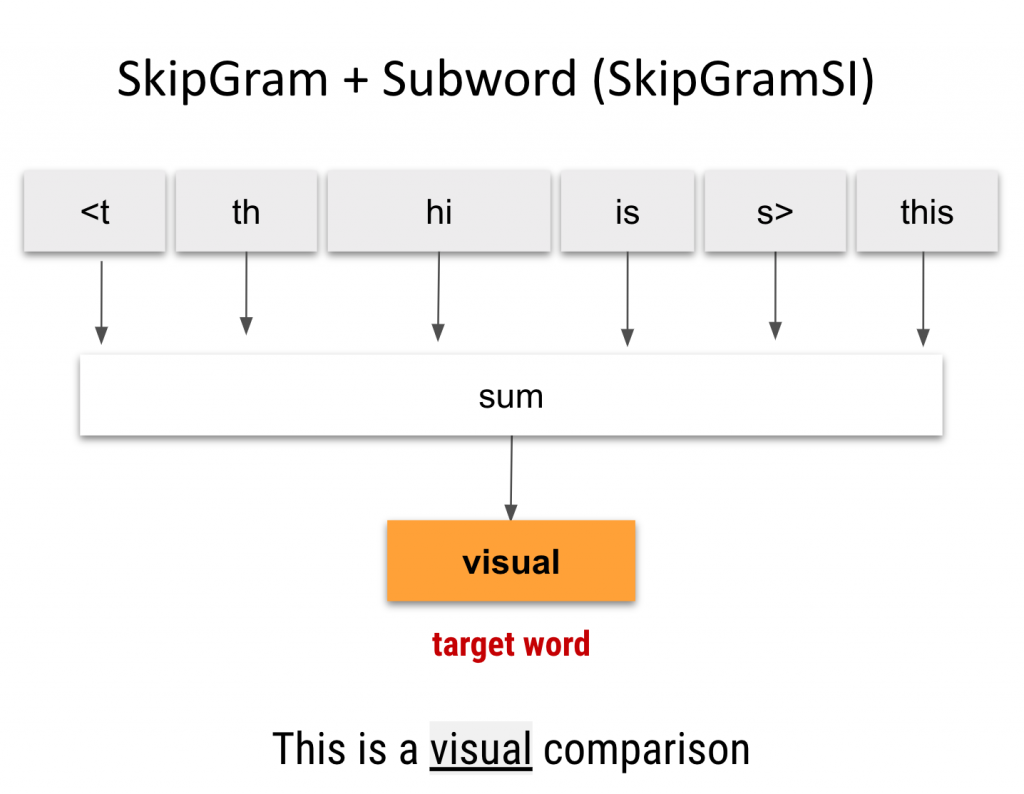

### Drawbacks

- Word embeddings **require a large corpus of text data** for training and may not perform well with small datasets.
- They also rely heavily on the quality of the training data and may encode biases present in the corpus.


## GloVe (Global Vectors for Word Representation)

GloVe (Global Vectors for Word Representation) is a word embedding model introduced by Jeffrey Pennington, Richard Socher, and Christopher D. Manning in 2014. It is an **unsupervised learning** algorithm used for obtaining **vector representations** for words.

### Design Purpose:

- GloVe constructs a co-occurrence matrix where each entry represents the number of times a word co-occurs with another word in the global corpus.
- It then learns word vectors by minimizing a weighted least squares regression objective function that captures the relationship between word vectors and their co-occurrence probabilities.


### Advantage

- **Global Co-occurrence Information**: GloVe leverages global `word co-occurrence statistics`, capturing richer semantic relationships between words beyond local contexts. It considers the `entire corpus` when learning word embeddings, which can lead to more informative embeddings.
- **Robustness to Out-of-Vocabulary Words**: GloVe can handle out-of-vocabulary words better than Word2Vec and FastText by leveraging global statistics. It can capture semantic similarities between words even if they do not appear frequently in local contexts.
- **Interpretability and Generalization**: GloVe embeddings often exhibit good interpretability and generalization capabilities due to their reliance on global co-occurrence statistics. They tend to capture broader semantic relationships and may generalize well to unseen data.


### Drawbacks

- **Memory Intensive**: GloVe requires storing a large co-occurrence matrix in memory, which can be memory-intensive, especially for very large corpora.
- **Training Complexity**: Although GloVe's objective function is relatively simple compared to neural network-based methods like Word2Vec, training GloVe still involves optimizing a large number of parameters.
- **Fixed Context Window**: GloVe typically operates using a fixed context window for calculating co-occurrence statistics. While this window size can be adjusted, it still represents a limitation in capturing contextual information compared to methods that dynamically adjust the context window based on word frequency or document structure.


### Example of co-occurrence matrix

Consider the following small corpus consisting of three sentences:

1. "I like natural language processing."
2. "I enjoy deep learning."
3. "I prefer natural language models."

GloVe calculates the co-occurrence matrix by counting how often each word appears in the context of other words within a certain window size. Let's assume a window size of 1 (i.e., considering adjacent words as context).

```
            | I | like | natural | language | processing | enjoy | deep | prefer | models |
-------------------------------------------------------------------------------------------
I           | 0 | 1    | 2       | 0        | 0          | 1     | 0    | 1      | 0      |
like        | 1 | 0    | 1       | 0        | 0          | 0     | 0    | 0      | 0      |
natural     | 2 | 1    | 0       | 1        | 1          | 0     | 0    | 1      | 1      |
language    | 0 | 0    | 1       | 0        | 1          | 0     | 0    | 0      | 1      |
processing  | 0 | 0    | 1       | 1        | 0          | 0     | 0    | 0      | 0      |
enjoy       | 1 | 0    | 0       | 0        | 0          | 0     | 1    | 0      | 0      |
deep        | 0 | 0    | 0       | 0        | 0          | 1     | 0    | 0      | 0      |
prefer      | 1 | 0    | 1       | 0        | 0          | 0     | 0    | 0      | 1      |
models      | 0 | 0    | 1       | 1        | 0          | 0     | 0    | 1      | 0      |
```


In [1]:
import numpy as np

def create_co_occurrence_matrix(corpus, window_size=1):
    vocabulary = set()
    co_occurrence_matrix = {}

    # Tokenize the corpus
    tokenized_corpus = [sentence.split() for sentence in corpus]

    # Build vocabulary and co-occurrence matrix
    for tokens in tokenized_corpus:
        for i, token in enumerate(tokens):
            if token not in vocabulary:
                vocabulary.add(token)
                co_occurrence_matrix[token] = {}
            
            for j in range(max(0, i - window_size), min(len(tokens), i + window_size + 1)):
                if i != j:
                    context_token = tokens[j]
                    if context_token not in co_occurrence_matrix[token]:
                        co_occurrence_matrix[token][context_token] = 0
                    co_occurrence_matrix[token][context_token] += 1

    # Convert co-occurrence matrix to numpy array
    vocab_list = list(vocabulary)
    matrix_size = len(vocabulary)
    co_occurrence_array = np.zeros((matrix_size, matrix_size), dtype=np.int32)
    
    for i, token1 in enumerate(vocab_list):
        for j, token2 in enumerate(vocab_list):
            if token2 in co_occurrence_matrix[token1]:
                co_occurrence_array[i, j] = co_occurrence_matrix[token1][token2]

    return co_occurrence_array, vocab_list

# Example usage
corpus = [
    "I like natural language processing.",
    "I enjoy deep learning.",
    "I prefer natural language models."
]

co_occurrence_matrix, vocabulary = create_co_occurrence_matrix(corpus, window_size=1)
print("Vocabulary:", vocabulary)
print("Co-occurrence matrix:")
print(co_occurrence_matrix)


Vocabulary: ['like', 'processing.', 'deep', 'models.', 'language', 'learning.', 'enjoy', 'I', 'natural', 'prefer']
Co-occurrence matrix:
[[0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 2 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 1 0 0 1]
 [1 0 0 0 2 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 1 0]]


## Contextualized word embeddings (ELMo and BERT)

### ELMo (Embeddings from Language Models)

- [Reference](https://ireneli.eu/2018/12/17/elmo-in-practice/)
- **Design Purpose:** ELMo was introduced by Matthew Peters and colleagues in 2018. It leverages deep contextualized word representations learned from `bidirectional language models` trained on large text corpora.
  - `ELMo` generates word embeddings by considering the entire input sentence and capturing the contextual meaning of words.
- **Model Architecture**: `ELMo` uses a deep `bidirectional LSTM (Long Short-Term Memory)` language model to learn contextual representations of words.
  - The model is trained to **predict the next word** in a sentence **given both the preceding and following words**, allowing it to capture complex syntactic and semantic dependencies.
- **Benefits**: `ELMo` embeddings are context-sensitive and capture fine-grained syntactic and semantic information.
  - They can handle polysemy, word sense disambiguation, and syntactic nuances effectively, making them suitable for a wide range of NLP tasks, including sentiment analysis, named entity recognition, and question answering.

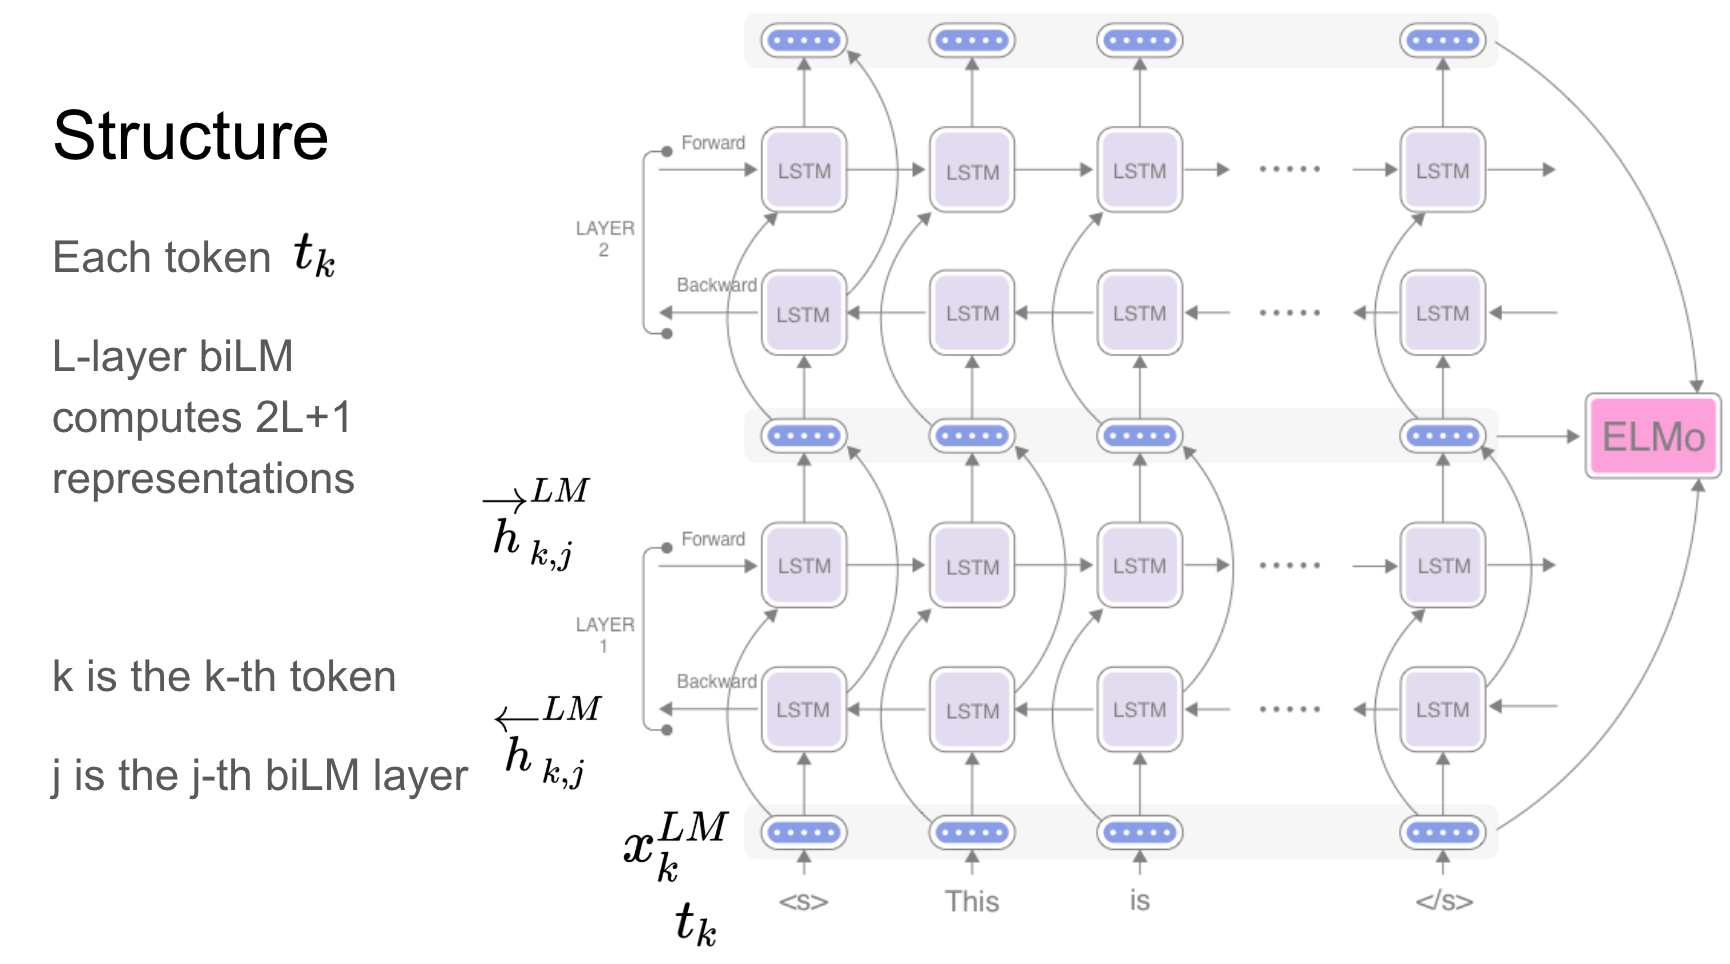


### BERT (Bidirectional Encoder Representations from Transformers)

- [Reference](https://www.geeksforgeeks.org/understanding-bert-nlp/)
- **Design Purpose**: `BERT`, introduced by Jacob Devlin and colleagues at Google AI in 2018, is a `transformer-based model` designed to generate deep contextualized word representations.
  - BERT is pretrained on large-scale text corpora using masked language modeling and **next sentence prediction tasks**, enabling it to capture bidirectional context information.
- **Model Architecture**: BERT consists of a stack of **transformer encoder layers** that process input sequences bidirectionally.
  - During `pretraining`, BERT masks some tokens in the input and predicts them based on the remaining context. This enables the model to learn contextualized embeddings that capture both local and global context information.
- **Benefits**: BERT embeddings capture rich contextual information and can model complex linguistic phenomena, including word ambiguity, syntactic structure, and discourse coherence.
  - BERT embeddings have achieved state-of-the-art performance on a wide range of NLP tasks, **including question answering, text classification, and natural language inference.**

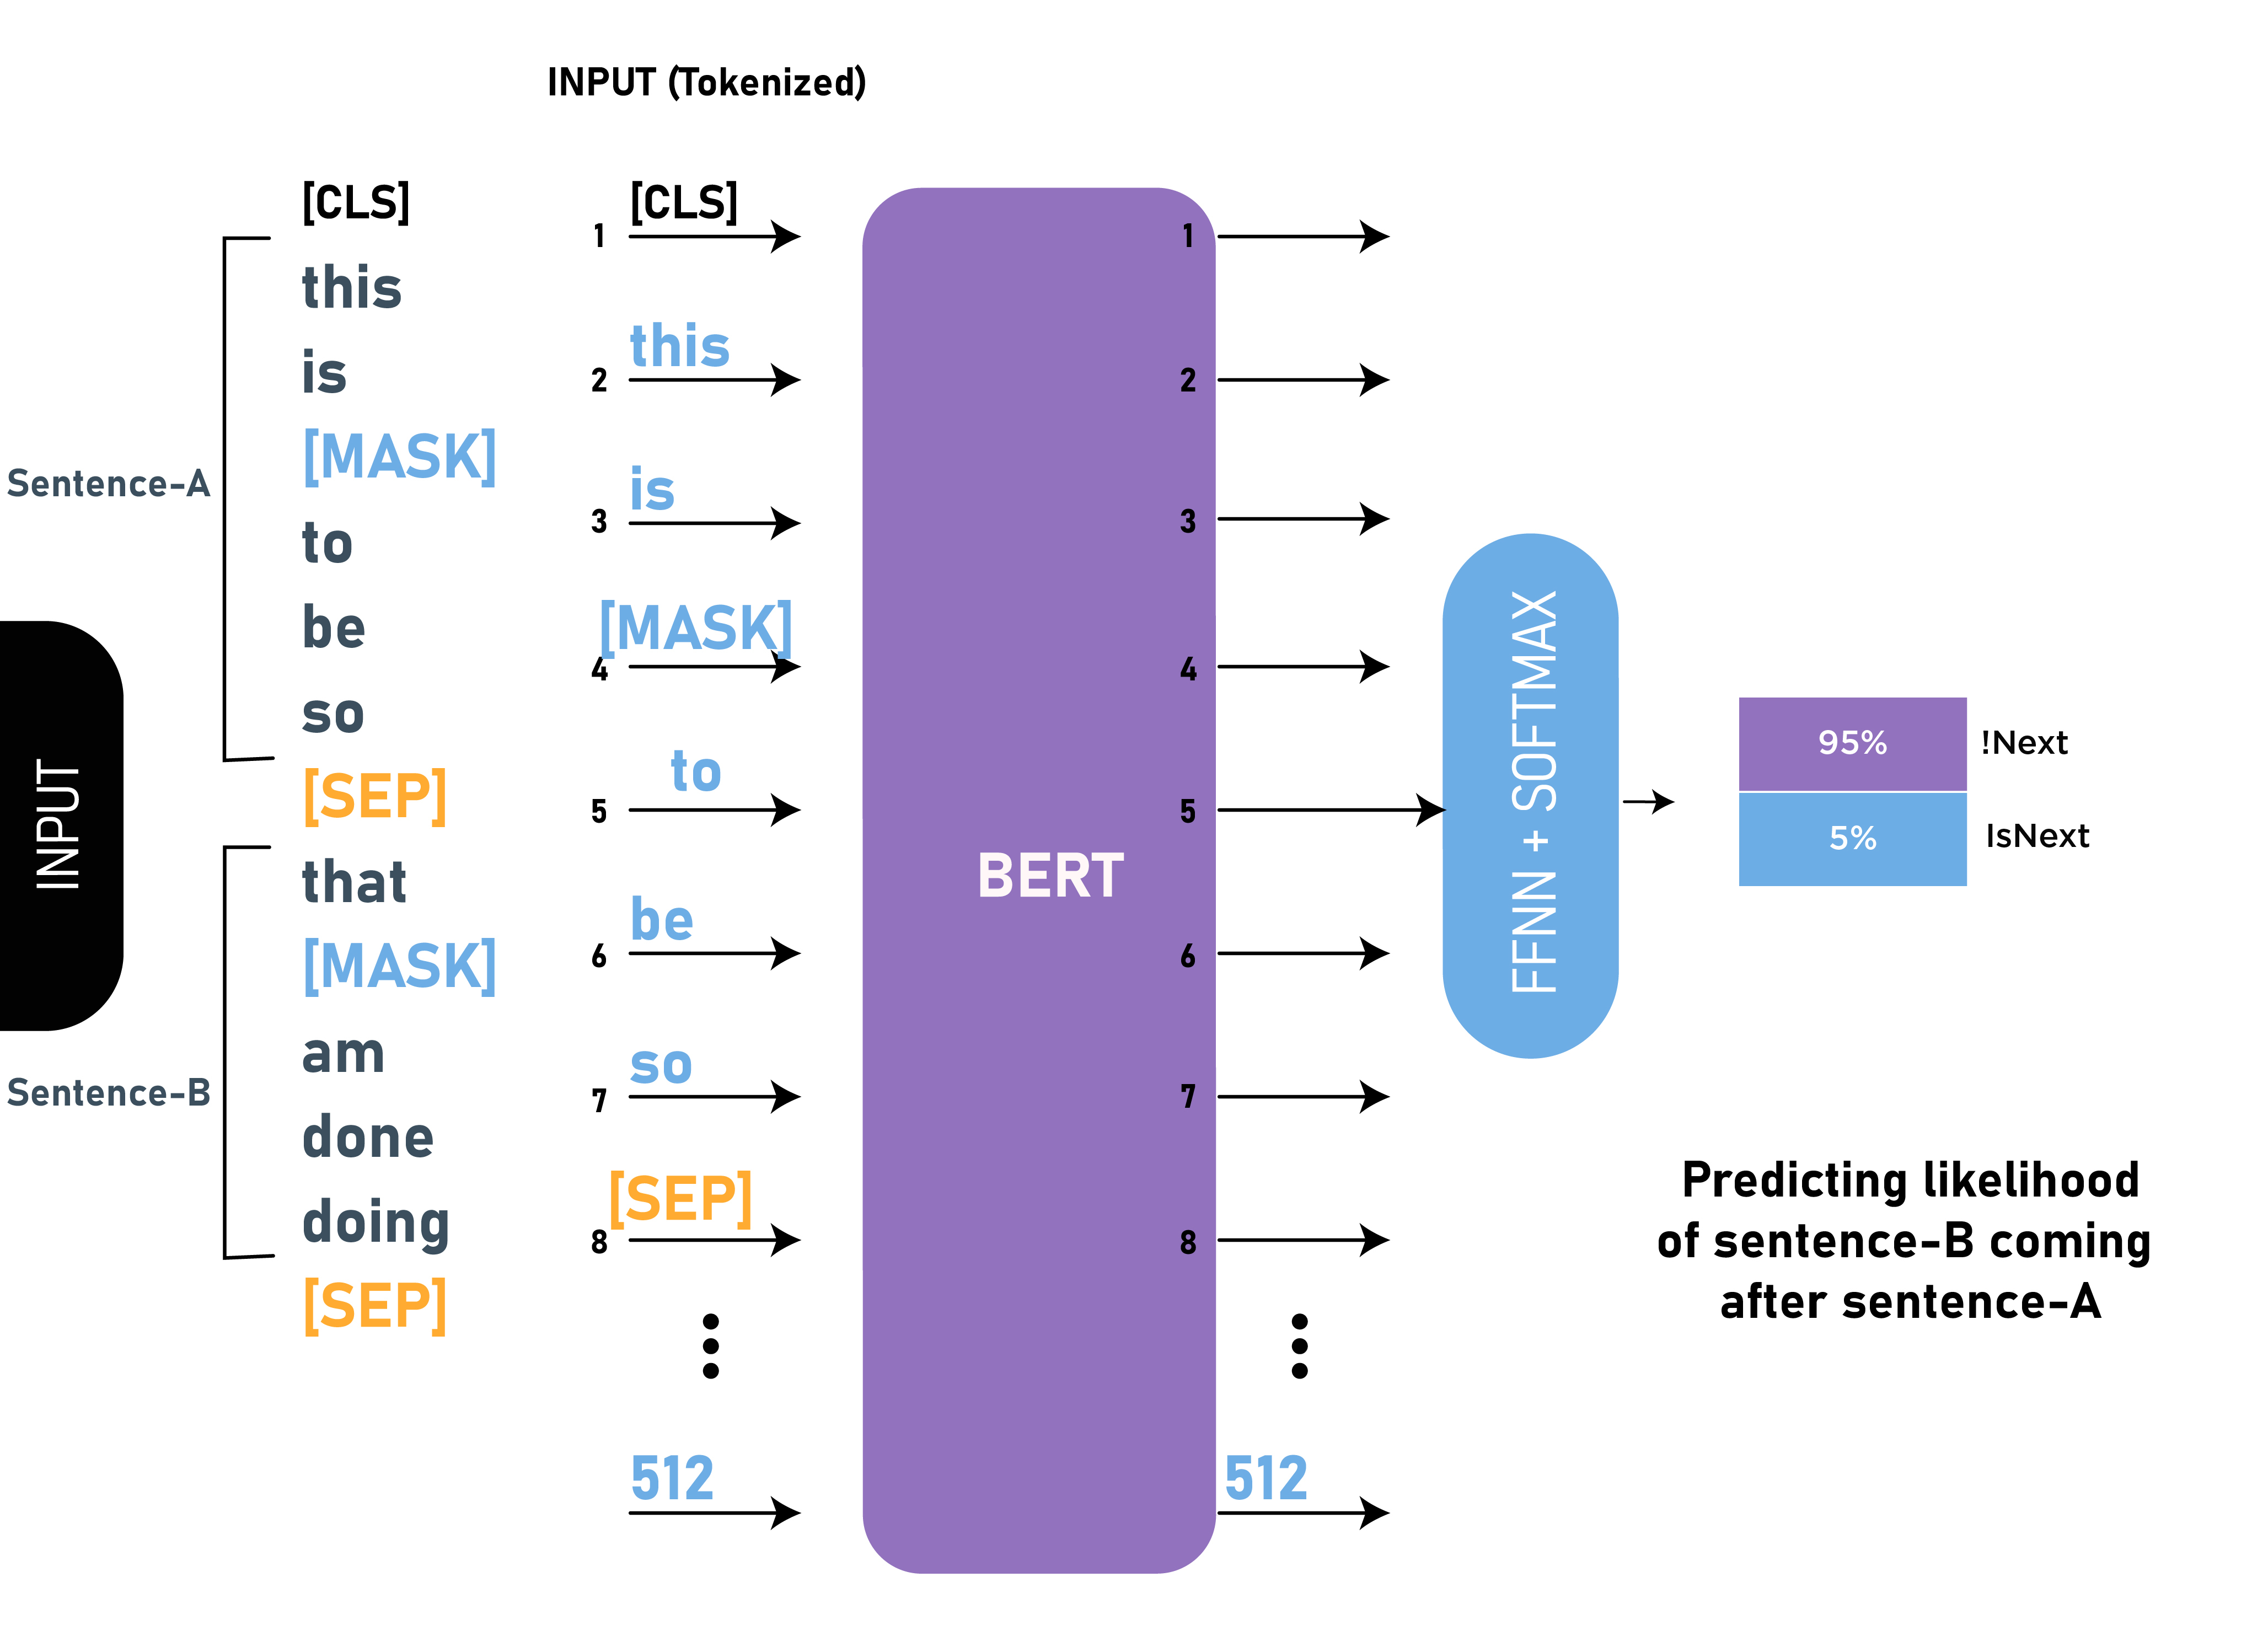


## Topic Modeling (LDA, LSA)

Topic Modeling is a technique used in natural language processing (NLP) to discover the **latent thematic structure** present in a collection of documents.

- It aims to **identify topics or themes** that pervade a corpus and the distribution of these topics across the documents.
- Two popular methods for topic modeling are `Latent Dirichlet Allocation (LDA)` and `Latent Semantic Analysis (LSA)`.

### Latent Dirichlet Allocation (LDA)

- [Reference](https://www.analyticsvidhya.com/blog/2021/06/part-2-topic-modeling-and-latent-dirichlet-allocation-lda-using-gensim-and-sklearn/)
- **Design Purpose**: `LDA`, introduced by Blei et al. in 2003, is a probabilistic generative model for topic modeling.
  - It assumes that documents are represented as a mixture of topics, and **each topic is represented as a distribution over words**.
  - LDA aims to infer the underlying topic structure by estimating the distribution of topics in each document and the distribution of words in each topic.
- **Model Assumptions**: LDA makes two key assumptions:
  1. Each document is a mixture of a small number of topics.
  2. Each word in a document is generated from one of the topics in the document's topic mixture.
- **Model Inference**: LDA uses Bayesian inference techniques, such as `variational inference` or `Gibbs sampling`, to estimate the posterior distribution of topics given the observed documents.
  - It iteratively updates the topic assignments of words in each document to find the most likely topic structure.

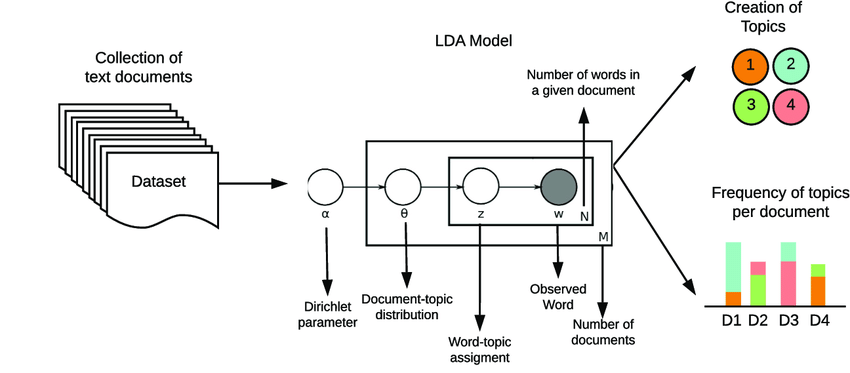
